In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



In [12]:
# read in data
original = pd.read_csv('original_data_predictions.csv')
new = pd.read_csv('btc_pred.csv')

In [13]:
# view original data + predicted temperatures for those years based on the TPOT optimizied pipeline
original.head(3)

,actual_temp,day,month,predicted_temp,year
0,0.841836,7.0,1.0,0.858958,2014.0
1,0.839156,8.0,1.0,0.928949,2014.0
2,0.831573,9.0,1.0,0.762353,2014.0


In [29]:
# view predictions for next 5 years
new.head(3)

,predicted_temp,month,year,actual_temp
0,0.377845,1.0,2016.0,NaN
1,0.046414,2.0,2016.0,NaN
2,0.114437,3.0,2016.0,NaN


In [15]:
# remove day column from original dataframe
original = original.drop('day',1)

In [16]:
# rename predicted temps in results dataframe
new.rename(columns={'Pred': 'predicted_temp'}, inplace=True)

In [30]:
new.head(3)

,predicted_temp,month,year,actual_temp
0,0.377845,1.0,2016.0,NaN
1,0.046414,2.0,2016.0,NaN
2,0.114437,3.0,2016.0,NaN


In [18]:
# add actual_temp column, full of NA's
new['actual_temp'] = np.nan

In [31]:
# view changes
new.head()

,predicted_temp,month,year,actual_temp
0,0.377845,1.0,2016.0,NaN
1,0.046414,2.0,2016.0,NaN
2,0.114437,3.0,2016.0,NaN
3,0.391761,4.0,2016.0,NaN
4,0.458116,5.0,2016.0,NaN


In [20]:
# combine dataframes
complete = original.append(new, ignore_index=True)

# view
complete

,actual_temp,month,predicted_temp,year
0,0.841836,1.0,0.858958,2014.0
1,0.839156,1.0,0.928949,2014.0
2,0.831573,1.0,0.762353,2014.0
3,0.844939,1.0,0.730322,2014.0
4,0.890672,1.0,0.909302,2014.0
5,0.860455,1.0,0.928988,2014.0
6,0.832260,1.0,0.792363,2014.0
7,0.845036,1.0,0.793120,2014.0
8,0.849509,1.0,0.895170,2014.0
9,0.847125,1.0,0.977403,2014.0


In [32]:
# group by year, and compute yearly mean temps 
grouped = complete.groupby('month').mean()

# view dataframe
grouped.head(3)

,actual_temp,predicted_temp,year
month,,,
1.0,3.135977,1.177536,2016.142857
2.0,1.695978,1.279071,2015.941606
3.0,0.588493,1.405731,2015.596899


In [22]:
# remove averaged month column. its unnecessary
#grouped = grouped.drop('month',1)

In [33]:
# reset index, so year is now column
grouped.reset_index(level=0, inplace=True)

In [34]:
# view
grouped.head(3)

,month,actual_temp,predicted_temp,year
0,1.0,3.135977,1.177536,2016.142857
1,2.0,1.695978,1.279071,2015.941606
2,3.0,0.588493,1.405731,2015.596899


In [37]:
grouped.rename(columns={'actual_temp': 'Yearly Average Actual Value','predicted_temp':'Yearly Average Predicted Value'}, inplace=True)

In [38]:
# view
grouped

,month,Yearly Average Actual Value,Yearly Average Predicted Value,year
0,1.0,3.135977,1.177536,2016.142857
1,2.0,1.695978,1.279071,2015.941606
2,3.0,0.588493,1.405731,2015.596899
3,4.0,0.587997,1.478465,2015.600000
4,5.0,0.759068,1.569123,2015.596899
5,6.0,1.022885,1.142324,2015.600000
6,7.0,1.014497,1.003915,2015.596899
7,8.0,1.296450,1.155117,2015.596899
8,9.0,1.329188,1.314250,2015.600000
9,10.0,1.640578,1.667226,2015.596899


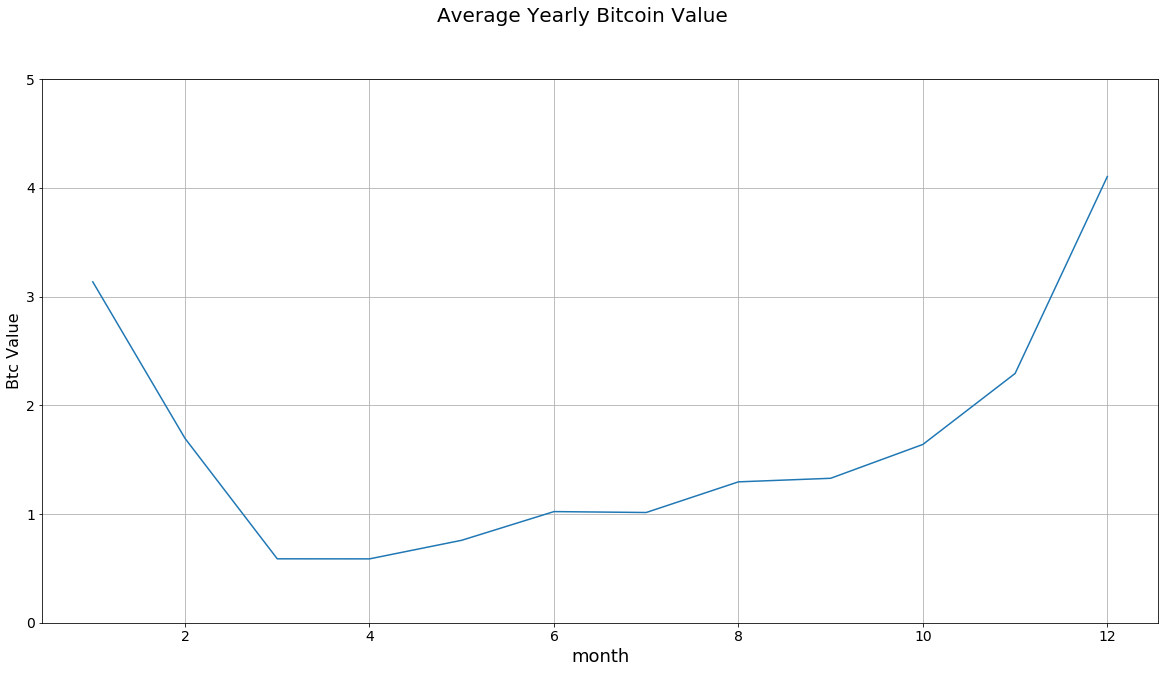

In [63]:
# Lets see what the average yearly bitcoin prediction looks like for the original data (actual values)
fig = plt.figure()
ax = grouped.plot('month','Yearly Average Actual Value',figsize=(20,10),grid=True,ylim=(0,5),fontsize=14,legend=False)
plt.suptitle('Average Yearly Bitcoin Value', fontsize=20)
plt.xlabel('month', fontsize=18)
plt.ylabel('Btc Value', fontsize=16)

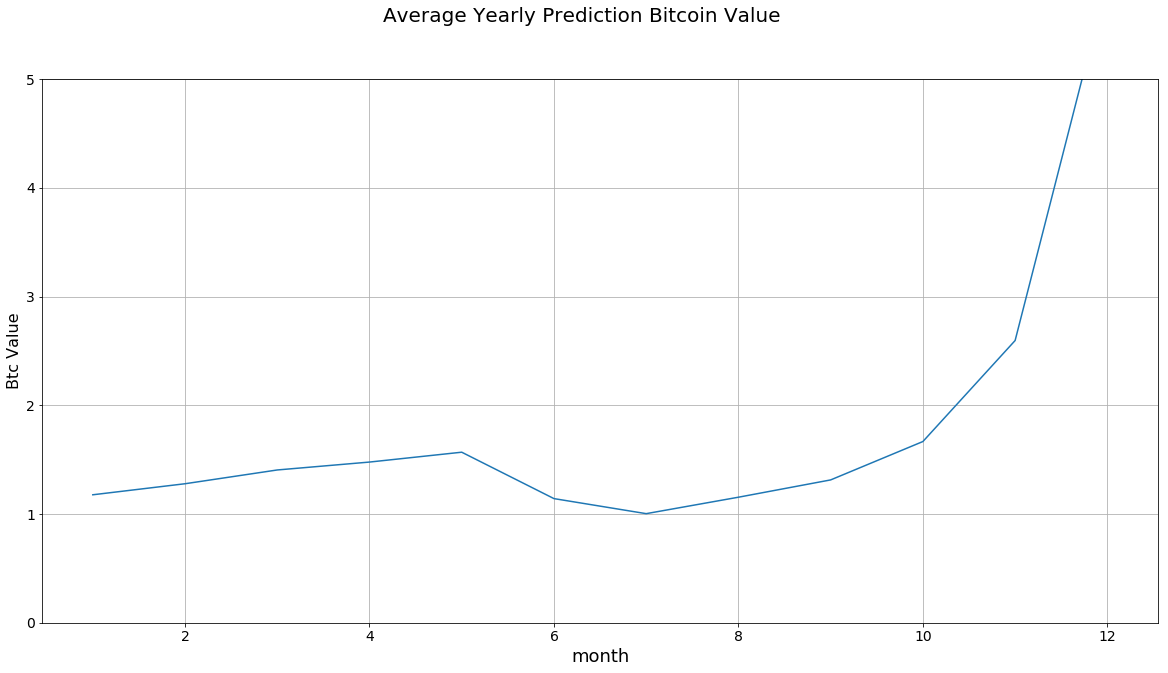

In [64]:
# Lets see what the average yearly bitcoin yearly prediction look like for the original data (actual values)
fig = plt.figure()
ax = grouped.plot('month','Yearly Average Predicted Value',figsize=(20,10),grid=True,ylim=(0,5),fontsize=14,legend=False)
plt.suptitle('Average Yearly Prediction Bitcoin Value', fontsize=20)
plt.xlabel('month', fontsize=18)
plt.ylabel('Btc Value', fontsize=16)

In [50]:
# convert to date-time
complete['datetime']=pd.to_datetime(complete.year*10000+complete.month*100+1,format='%Y%m%d')

# drop month year columns
complete = complete.drop('month',1)
complete = complete.drop('year',1)

# view
complete

,actual_temp,predicted_temp,datetime
0,0.841836,0.858958,2014-01-01
1,0.839156,0.928949,2014-01-01
2,0.831573,0.762353,2014-01-01
3,0.844939,0.730322,2014-01-01
4,0.890672,0.909302,2014-01-01
5,0.860455,0.928988,2014-01-01
6,0.832260,0.792363,2014-01-01
7,0.845036,0.793120,2014-01-01
8,0.849509,0.895170,2014-01-01
9,0.847125,0.977403,2014-01-01


In [51]:
# rename columns appropriately
complete.rename(columns={'actual_temp': 'Yearly Average Actual Value','predicted_temp':'Yearly Average Predicted Value','datetime':'Date'}, inplace=True)

In [55]:
complete

,Yearly Average Actual Value,Yearly Average Predicted Value,Date
0,0.841836,0.858958,2014-01-01
1,0.839156,0.928949,2014-01-01
2,0.831573,0.762353,2014-01-01
3,0.844939,0.730322,2014-01-01
4,0.890672,0.909302,2014-01-01
5,0.860455,0.928988,2014-01-01
6,0.832260,0.792363,2014-01-01
7,0.845036,0.793120,2014-01-01
8,0.849509,0.895170,2014-01-01
9,0.847125,0.977403,2014-01-01


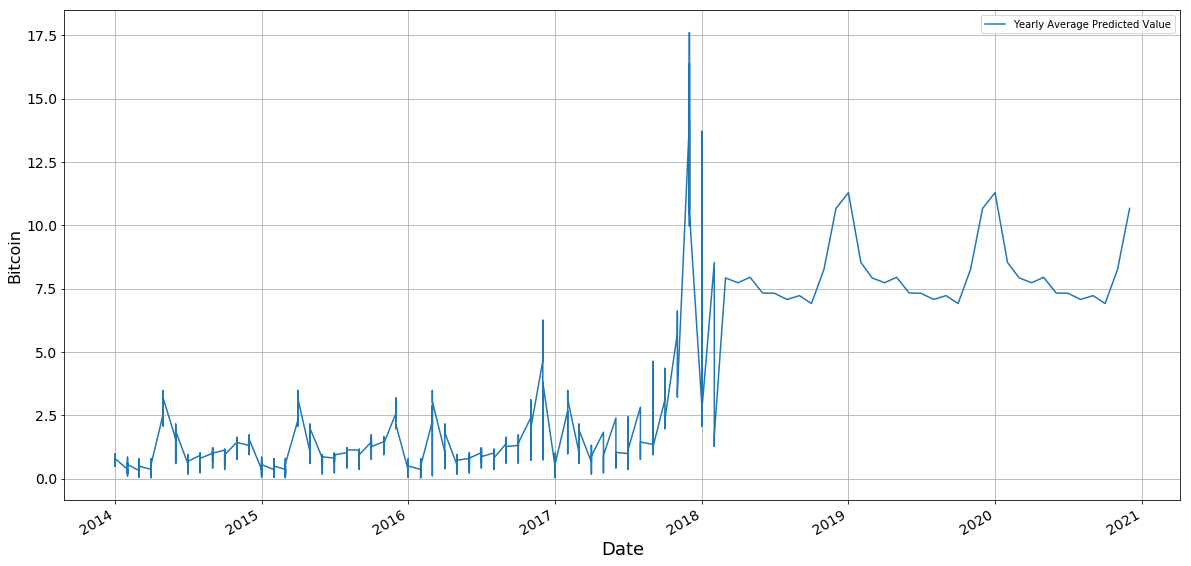

In [62]:
fig = plt.figure()
ax = complete.plot('Date','Yearly Average Predicted Value',figsize=(20,10),grid=True,fontsize=14,legend=True)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Bitcoin', fontsize=16)